In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
import random

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [32]:
mnist = tf.keras.datasets.mnist 
# 28*28 images of hand-written digits 0-9
print('Total number of images in this dataset')
len(x_train) + len(x_test)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
print('After Splitting the data set we have')
print('Total number of training images')
len(x_train)
print('Total number of testing images')
len(x_test)

Total number of images in this dataset


70000

After Splitting the data set we have
Total number of training images


60000

Total number of testing images


10000

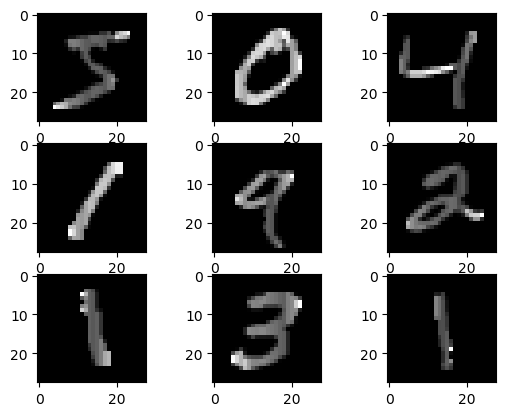

In [31]:
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [25]:
model.compile(optimizer='adam' ,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 4s 81us/sample - loss: 0.2792 - acc: 0.9186 - val_loss: 0.1224 - val_acc: 0.9643
Epoch 2/3
54000/54000 [==============================] - 4s 73us/sample - loss: 0.1107 - acc: 0.9658 - val_loss: 0.0978 - val_acc: 0.9690
Epoch 3/3
54000/54000 [==============================] - 4s 75us/sample - loss: 0.0757 - acc: 0.9762 - val_loss: 0.0771 - val_acc: 0.9768


Text(0.5, 1.0, 'Model accuracy')

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Epoch')

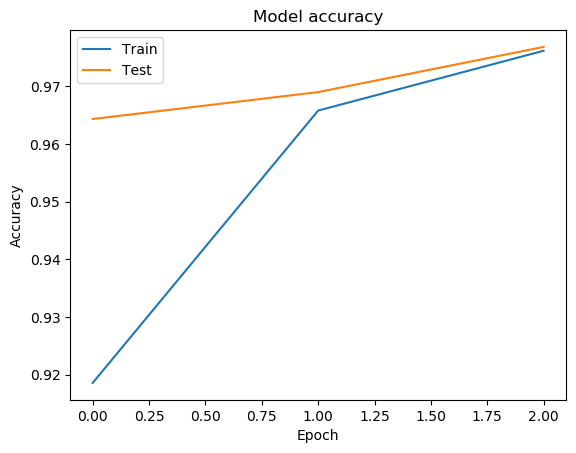

Text(0.5, 1.0, 'Model loss')

Text(0, 0.5, 'Loss')

Text(0.5, 0, 'Epoch')

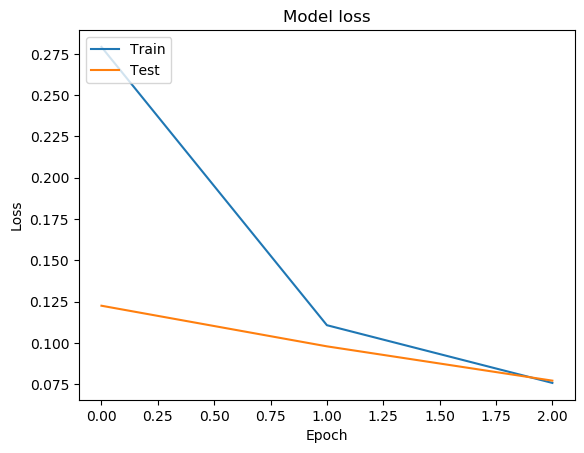

In [26]:
history = model.fit(x_train, y_train, epochs = 3, verbose = 1, validation_split = 0.1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 23us/sample - loss: 0.0912 - acc: 0.9705
0.09124624484293163 0.9705


Text(0.5, 1.0, 'Prediction: 2')

Text(0.5, 1.0, 'Prediction: 9')

Text(0.5, 1.0, 'Prediction: 7')

Text(0.5, 1.0, 'Prediction: 8')

Text(0.5, 1.0, 'Prediction: 5')

Text(0.5, 1.0, 'Prediction: 8')

Text(0.5, 1.0, 'Prediction: 2')

Text(0.5, 1.0, 'Prediction: 1')

Text(0.5, 1.0, 'Prediction: 7')

Text(0.5, 1.0, 'Prediction: 3')

Text(0.5, 1.0, 'Prediction: 9')

Text(0.5, 1.0, 'Prediction: 6')

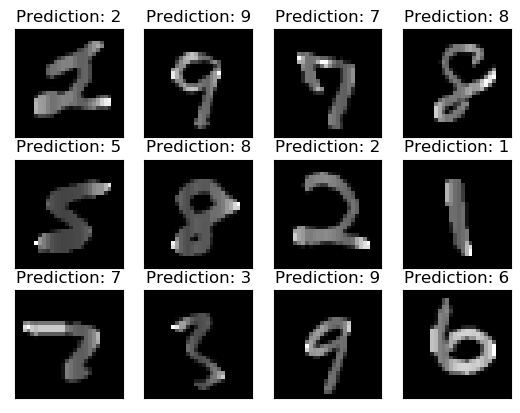

In [33]:
i = 0
fig = plt.figure()
test = random.sample(list(x_test), 12)
predictions = model.predict([test])
    
for num, data in enumerate(test):
    y = fig.add_subplot(3,4,num+1)  
    y.imshow(data,'gray')
    plt.title('Prediction: {}'.format(np.argmax(predictions[i])))
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    i = i+ 1
plt.show()